In [1]:
import menpo
import menpofit
import pickle
from pathlib import Path

with open('lk_aam_fitter.pkl', 'rb') as f:
    fitter = pickle.load(f)

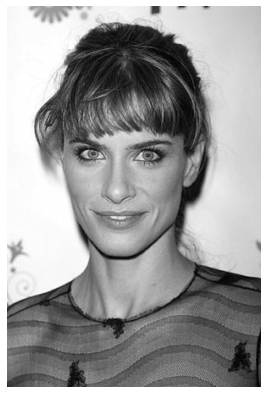

In [2]:
def preprocess_img(img):
    #img = img.crop_to_landmarks_proportion(0.1)
    if img.n_channels == 3:
        img = img.as_greyscale(mode='luminosity')
    return img


test_img = preprocess_img(menpo.io.import_image(Path('./lfpw/trainset/image_0002.png')))
test_img.view()

In [3]:
    from menpodetect.dlib.detect import DlibDetector
    import dlib

In [4]:
ff_detector = dlib.get_frontal_face_detector()
bboxes = DlibDetector(ff_detector)(test_img, greyscale=True)

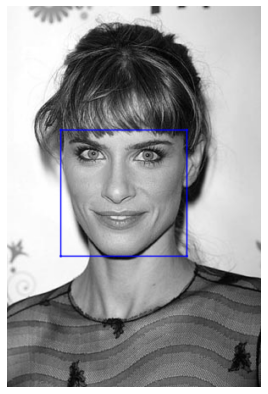

In [5]:
#test_img.constrain_landmarks_to_bounds()
test_img.rasterize_landmarks(group='dlib_0').view()

In [6]:
fr = fitter.fit_from_bb(test_img, bboxes[0], max_iters=100)

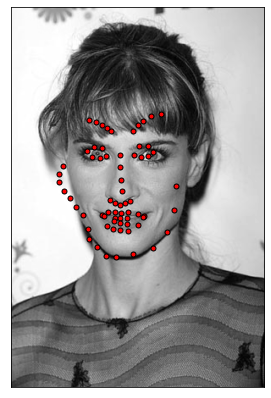

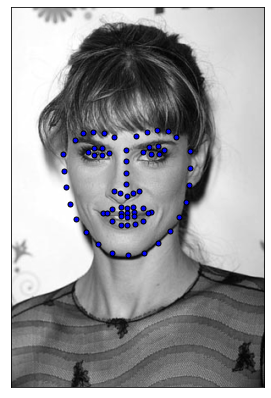

In [7]:
fr.image.view(new_figure=True);
fr.final_shape.view();

fr.image.view(new_figure=True);
fr.initial_shape.view(marker_face_colour='blue');